# Decision Making I

## Céline Budding && Dorothea Müller 

In [1]:
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt

%matplotlib inline

### 1. Extension-Drift Model

### 1.

In [2]:
def euler_maruyama(ffun, gfun, x0, t, **args):
    """Euler Maruyama method for stochastic differential equations. x0 must be a list."""
    dts = np.diff(t).astype(float)
    res = np.zeros((len(t), len(x0)))
    res[0] = x0
    
    for i in range(1, len(t)-1):
        # Euler part.
        res[i] = np.multiply(ffun(res[i-1], t, **args), dts[i]) + res[i-1]
        
        gfun_res = gfun(res[i-1], t, **args)
        if isinstance(gfun_res, float) or isinstance(gfun_res, int):
            gfun_res = np.repeat(gfun_res, res[i].shape[0])
        
        # For each component, sample from random normal distribution!
        rand_vals = np.random.normal(0, 1, res[i].shape[0])
        
        for j, _ in enumerate(res[i]):
            # For each component, sample noise independently from random normal distribution.
            res[i, j] = res[i, j] + gfun_res[j] * rand_vals[j] * np.sqrt(dts[i])
    return res

In [3]:
x0 = [0]
sigma = 0.5
mu = 0.2
t = np.linspace(0, 10, 1001)
n_sm = 5

In [4]:
ffn = lambda x, t, **args: args['mu']
gfn = lambda x, t, **args: args['sigma']

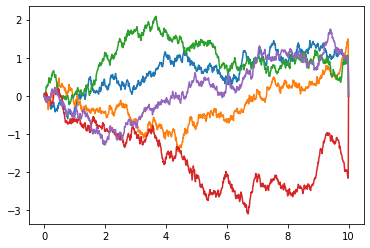

In [5]:
for run in range(n_sm):
    res = euler_maruyama(ffn, gfn, x0, t, sigma = 0.5, mu = 0.2)
    plt.plot(t, res)

### 2.

In [6]:
def simulate_up(a = 1, mu_val= [-0.1, 0, 0.1, 0.2, 0.5], n=200, sigma=0.5):

    perc_up = np.zeros(len(mu_val))
    res = np.zeros(len(t))
    
    for i, mu in enumerate(mu_val):
    
        n_successfull = 0
        for _ in range(n):
            
            res[-2] = 0
#             # Resample when no decision boundary is found
            while(res[-2] < a and res[-2] > -a):
                res = euler_maruyama(ffn, gfn, x0, t, mu=mu, sigma=sigma)
#             res = euler_maruyama(ffn, gfn, x0, t, mu = mu, sigma=sigma)
        
            if res[-2] > a:
                n_successfull +=1

        perc_up[i] = n_successfull/n  * 100
        
    return perc_up

In [7]:
mu_val = [-0.1, 0, 0.1, 0.2, 0.5]
a_val = [0.5, 1, 2]
n = 200

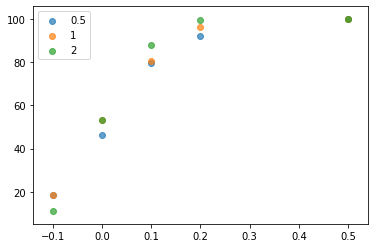

In [8]:
for a in a_val:
    res_a = simulate_up(a = a)
    plt.scatter(mu_val, res_a, label = f"{a}", alpha = 0.5)

plt.legend()

* For a lower mu, it is more likely that we end below the negative decision boundary and vice versa.

* **What happens to this curve if you double, what if you halve the value of a?**
If the value is halfed, the percentage of 'up' trials go down. This can be explained as random fluctuations are more likely to go over the decision boundary, even if it is in the different direction than the drift. Vice versa, if the decision boundary is really high, random flucuations are more likely to push the system over the decision boundary.

We will pick a value of mu = 0.05 to reach 70% up-trials.

### 3.

In [46]:
def simulate_times(a = 1, mu_val= 0.05, n=2000, sigma=0.5):
    res = np.zeros(len(t))
    
    yes_times = []
    no_times = []
    
    for _ in range(n):   
        res[-2] = 0
        idx_greater = n+1
        idx_smaller = n+1

        # Resample when no decision boundary is found
        while(res[-2] < a and res[-2] > -a):
            res = euler_maruyama(ffn, gfn, x0, t, mu=mu, sigma=sigma).flatten()

        # Compare occurences.
        if res[res>a].size != 0:
            idx_greater = np.argwhere(res>a)[0][0]

        if res[res<-a].size != 0:
            idx_smaller = np.argwhere(res<-a)[0][0]

        if idx_greater < idx_smaller:
            yes_times.append(t[idx_greater])

        else:
            no_times.append(t[idx_smaller])
        
    return yes_times, no_times 

In [47]:
yes_time, no_time = simulate_times()

## 4.

Mean for Up: 3.4961815453863463


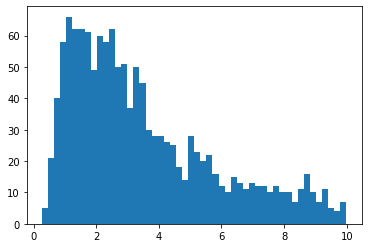

In [58]:
plt.hist(yes_time, bins = 50);
print(f"Mean for Up: {np.mean(yes_time)}")

Mean for Down: 3.607016491754123


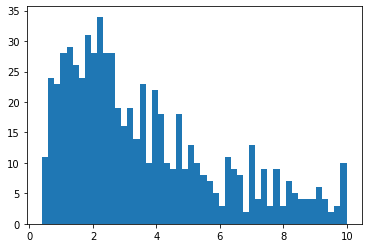

In [57]:
plt.hist(no_time, bins = 50);
print(f"Mean for Down: {np.mean(no_time)}")

**Is this what you would have expected?**

* Size: We would have expected for the height of the up times to be even more higher in comparison to the down times.
* Mean: The mean is similar between the distributions and this is what we would have expected from the reaction time distributions.